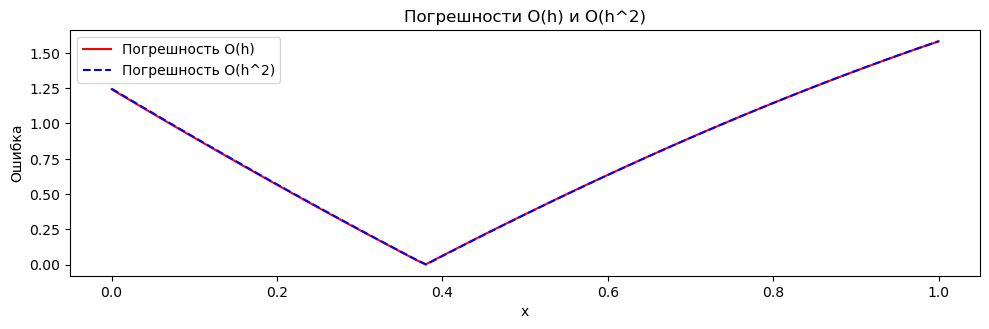

||u-y||= 0.08843482581676762


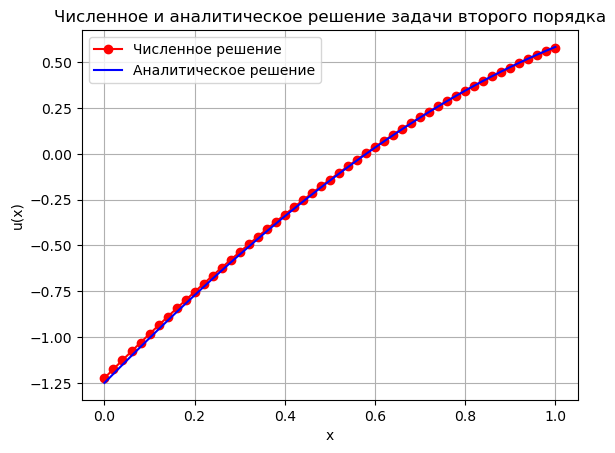

In [1]:
import numpy as np
import matplotlib.pyplot as plt

sigma0 = 1
gamma0 = 2
g0 = 0

sigma1 = 1
gamma1 = 0
g1 = 1

def f(x):
    return x + 1

# Функция для численного решения методом конечных разностей и прогонки
def solve(N):
    h = 1 / N  
    x = np.linspace(0, 1, N + 1)  

    a = np.zeros(N + 1)
    b = np.zeros(N + 1)
    c = np.zeros(N + 1)
    d = np.zeros(N + 1)

    for i in range(1, N):
        a[i] = 1 / h**2
        b[i] = -2 / h**2
        c[i] = 1 / h**2
        d[i] = -f(x[i])

    b[0] = sigma0 / h - gamma0
    c[0] = -sigma0 / h
    d[0] = -g0

    a[N] = -sigma1 / h
    b[N] = sigma1 / h + gamma1
    d[N] = g1

    # Прогонка
    alpha = np.zeros(N + 1)
    beta = np.zeros(N + 1)

    # Прямой ход
    alpha[1] = -c[0] / b[0]
    beta[1] = d[0] / b[0]

    for i in range(1, N):
        alpha[i + 1] = -c[i] / (a[i] * alpha[i] + b[i])
        beta[i + 1] = (d[i] - a[i] * beta[i]) / (a[i] * alpha[i] + b[i])

    # Обратный ход
    u = np.zeros(N + 1)
    u[N] = (d[N] - a[N] * beta[N]) / (a[N] * alpha[N] + b[N])

    for i in range(N - 1, -1, -1):
        u[i] = alpha[i + 1] * u[i + 1] + beta[i + 1]

    return x, u

def analytical_solution(x):
    return (-1 * x**3)/6 - 0.5 * x**2 +2.5*x -1.25   

N = 50
x, u_numeric = solve(N)

u_analytic = analytical_solution(x)
print("||u-y||=", np.linalg.norm(u_numeric-u_analytic))
# Построение графика
plt.plot(x, u_numeric, 'ro-', label='Численное решение')
plt.plot(x, u_analytic, 'b-', label='Аналитическое решение')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Численное и аналитическое решение задачи второго порядка')
plt.grid(True)
plt.legend()
plt.show()


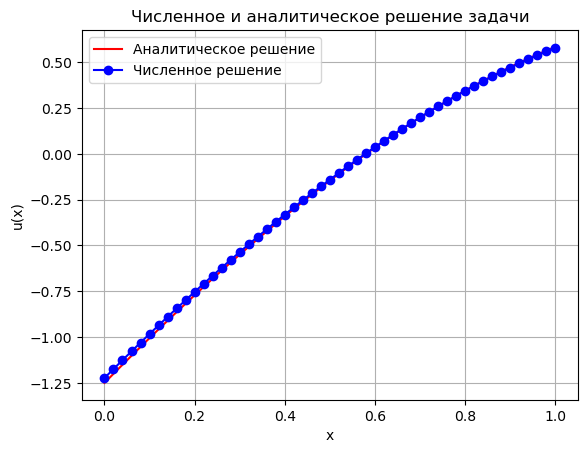

In [17]:
import numpy as np
import matplotlib.pyplot as plt

sigma0 = 1
gamma0 = 2
g0 = 0

sigma1 = 1
gamma1 = 0
g1 = 1

def f(x):
    return x + 1

# Функция для численного решения методом конечных разностей и прогонки
def solve(N):
    h = 1 / N  
    x = np.linspace(0, 1, N + 1)  

    # Создаем массивы для диагоналей системы уравнений
    a = np.zeros(N + 1)
    b = np.zeros(N + 1)
    c = np.zeros(N + 1)
    d = np.zeros(N + 1)

    # Задаем коэффициенты системы
    for i in range(1, N):
        a[i] = 1 / h**2
        b[i] = -2 / h**2
        c[i] = 1 / h**2
        d[i] = -f(x[i])

    # Учитываем граничные условия
    b[0] = sigma0 / h - gamma0
    c[0] = -sigma0 / h
    d[0] = -g0

    a[N] = -sigma1 / h
    b[N] = sigma1 / h + gamma1
    d[N] = g1

    # Прогонка
    alpha = np.zeros(N + 1)
    beta = np.zeros(N + 1)

    # Прямой ход
    alpha[1] = -c[0] / b[0]
    beta[1] = d[0] / b[0]

    for i in range(1, N):
        alpha[i + 1] = -c[i] / (a[i] * alpha[i] + b[i])
        beta[i + 1] = (d[i] - a[i] * beta[i]) / (a[i] * alpha[i] + b[i])

    # Обратный ход
    u = np.zeros(N + 1)
    u[N] = (d[N] - a[N] * beta[N]) / (a[N] * alpha[N] + b[N])

    for i in range(N - 1, -1, -1):
        u[i] = alpha[i + 1] * u[i + 1] + beta[i + 1]

    return x, u

# Аналитическое решение 
def analytical_solution(x):
    return (-1 * x**3)/6 - 0.5 * x**2 +2.5*x -1.25 

# Решаем задачу для N=50
N = 50
x, u_numeric = solve(N)

# Аналитическое решение на той же сетке
u_analytic = analytical_solution(x)

# Построение графика: численное решение - синяя линия с кружками, аналитическое - красная линия
plt.plot(x, u_analytic, 'r-', label='Аналитическое решение')  # Красная линия
plt.plot(x, u_numeric, 'bo-', label='Численное решение')  # Синие кружки с соединяющей линией

plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Численное и аналитическое решение задачи')
plt.grid(True)
plt.legend()
plt.show()
